<a href="https://colab.research.google.com/github/ujjwalmutneja/AIML-Project/blob/main/Superstore_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**- Superstore sale data






##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Team
##### **Team Member 1 -**   Ujjwal
##### **Team Member 2 -**   Vaibhav Rana
##### **Team Member 3 -**   Utsav
##### **Team Member 4 -**   Tushar Singla

# **Project Summary -**

Write the summary here within 500-600 words.

The analysis reveals distinct seasonal patterns in sales, with peak periods coinciding with holidays and promotions. Understanding these trends can help optimize inventory management and marketing strategies to capitalize on peak demand periods.


# **GitHub Link -**

https://github.com/ujjwalmutneja/AIML-Project.git

# **Problem Statement**


**Write Problem Statement Here.**
The Superstore Sales Data consists of various attributes such as order details, customer information, product categories, sales figures, and geographical information. The goal is to leverage this dataset to gain insights that will help improve business performance, optimize operations, and enhance customer satisfaction.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import math



### Dataset Loading

In [ ]:
# Load Dataset
df = pd.read_csv("/content/train2.csv")
df.sample(20)




,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3180,3181,CA-2017-105235,12/5/2017,12/11/2017,Standard Class,SM-20950,Suzanne McNair,Corporate,United States,New York City,...,10011,East,OFF-AP-10001271,Office Supplies,Appliances,Eureka The Boss Cordless Rechargeable Stick Vac,254.9000,5,0.00,68.8230
2320,2321,CA-2017-165491,3/20/2017,3/24/2017,Standard Class,HW-14935,Helen Wasserman,Corporate,United States,Seattle,...,98115,West,TEC-AC-10000358,Technology,Accessories,Imation Secure Drive + Hardware Encrypted USB ...,265.9300,7,0.00,63.8232
8183,8184,CA-2017-155642,5/18/2017,5/22/2017,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Chicago,...,60653,Central,FUR-FU-10001918,Furniture,Furnishings,C-Line Cubicle Keepers Polyproplyene Holder Wi...,1.8920,1,0.60,-0.9933
3854,3855,US-2017-131849,6/6/2017,6/10/2017,Standard Class,GH-14410,Gary Hansen,Home Office,United States,San Francisco,...,94122,West,OFF-ST-10002957,Office Supplies,Storage,Sterilite Show Offs Storage Containers,26.4000,5,0.00,0.0000
600,601,US-2016-100720,7/16/2016,7/21/2016,Standard Class,CK-12205,Chloris Kastensmidt,Consumer,United States,Philadelphia,...,19120,East,TEC-PH-10003963,Technology,Phones,GE 2-Jack Phone Line Splitter,494.3760,4,0.40,-115.3544
5607,5608,CA-2017-105193,3/25/2017,3/31/2017,Standard Class,JL-15835,John Lee,Consumer,United States,New York City,...,10024,East,OFF-AR-10001547,Office Supplies,Art,Newell 311,11.0500,5,0.00,2.9835
2801,2802,US-2015-110163,11/1/2015,11/4/2015,First Class,GA-14725,Guy Armstrong,Consumer,United States,Salem,...,97301,West,OFF-AR-10001683,Office Supplies,Art,Lumber Crayons,7.8800,1,0.20,1.7730
6150,6151,US-2016-106600,4/8/2016,4/11/2016,First Class,RM-19375,Raymond Messe,Consumer,United States,Columbus,...,31907,South,FUR-BO-10001608,Furniture,Bookcases,"Hon Metal Bookcases, Black",354.9000,5,0.00,88.7250
9707,9708,CA-2016-161746,10/21/2016,10/27/2016,Standard Class,CS-11950,Carlos Soltero,Consumer,United States,Los Angeles,...,90045,West,OFF-AR-10000390,Office Supplies,Art,Newell Chalk Holder,12.3900,3,0.00,5.6994
588,589,US-2016-156986,3/20/2016,3/24/2016,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,United States,Salem,...,97301,West,TEC-PH-10003800,Technology,Phones,i.Sound Portable Power - 8000 mAh,84.7840,2,0.20,-20.1362


### Dataset First View

In [ ]:
df.head(20)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(9994, 21)

### Dataset Information

In [ ]:
# Dataset Info
#df.info()

dm=df.copy();

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
du=df.duplicated().value_counts()
du

False    9994
Name: count, dtype: int64

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
#indices = np.where(pd.isnull(df))
#indices.value_counts()
df.isnull().sum()

#print(indices).value_count()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

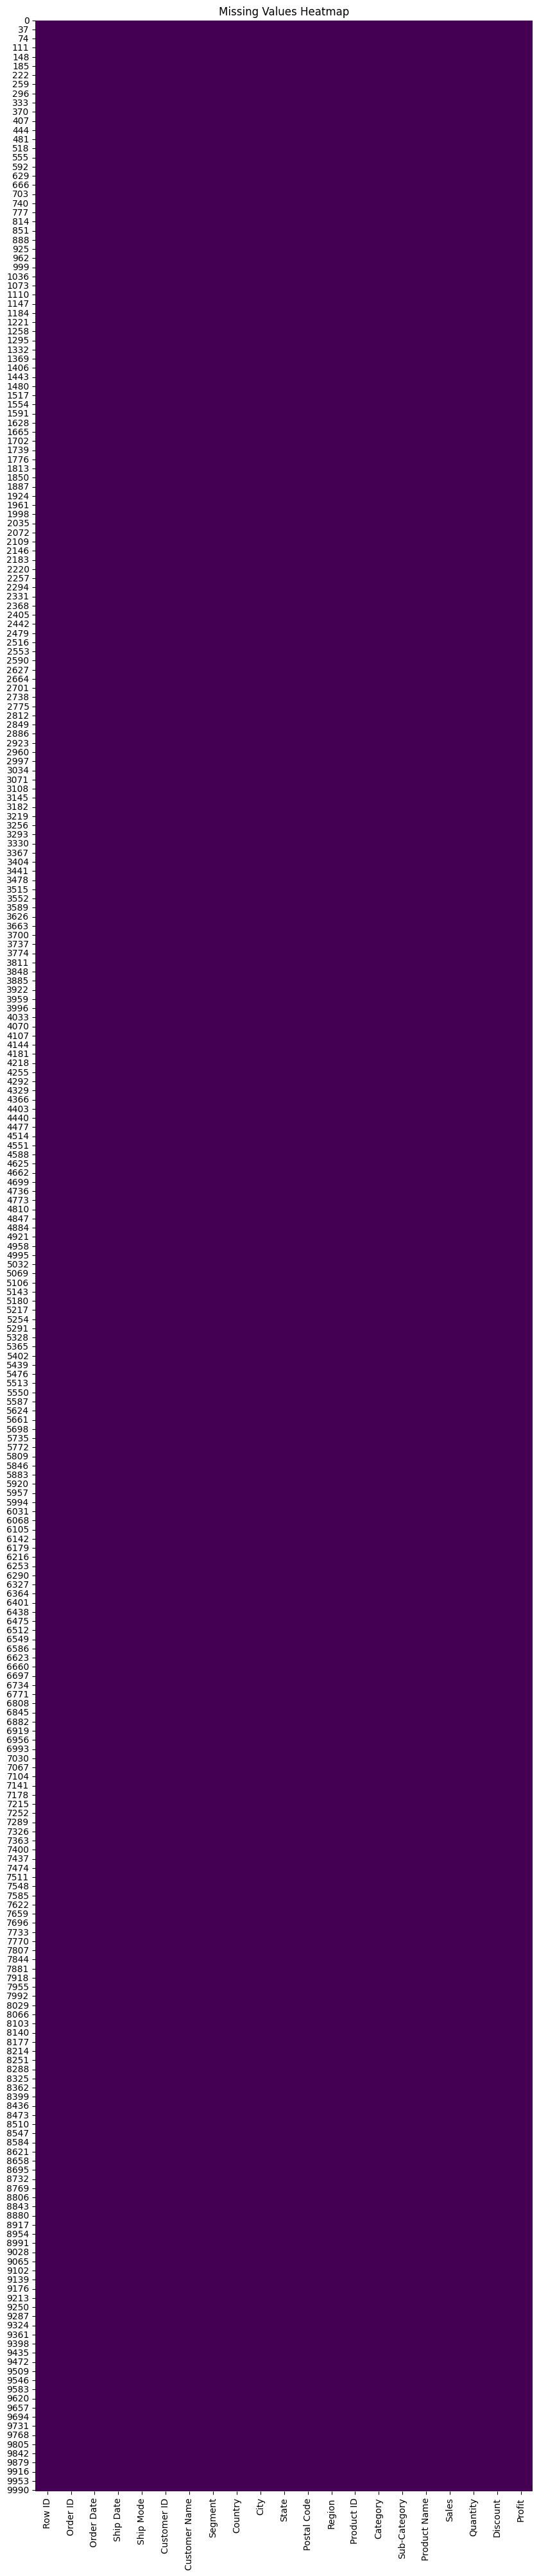

In [ ]:
# Visualizing the missing values
#df.isnull().sum()
# so in data set v23 to v28 have 1 missing value but colums v1 to v27 have no missing value
plt.figure(figsize=(10,50))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

### What did you know about your dataset?

Our Data is About superstore Sales Data and we get to know there are 9800 rows and 15 colums. In this data we have around 11 Null values in postal code columns.the output indicates that out of the total number of rows in the DataFrame, which seems to be 9800, none of them are duplicates. Each row in the DataFrame is unique.Through this data set we are finding different factor affecting sales like region,state etc.









## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [ ]:
# Dataset Describe
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Variables Description

**'Ship Mode':**    Different modes of shipment such as standard, express, etc.

**'Segment':**   Segmentation of customers into different categories (e.g., consumer, corporate, home office).

**'Country':** Names of different countries where sales transactions occur.

**'City':** Names of cities where sales transactions are made.

**'State':** Names of states or provinces within countries.

'**Region**': Geographic regions or areas where sales transactions take place.

'**Category**': Broad categories to which products belong (e.g., office supplies, technology, furniture).

**'Sub-Category'**: Subcategories within product categories (e.g., chairs, tables, phones).

**Row ID:** Sequential index for dataset organization and management.

**Order ID:** Unique identifier for tracking individual sales orders.

**Order Date:** Date when a sales order was placed by a customer.

**Ship Date:** Date when ordered products are shipped to customers.

**Product ID:** Unique identifier for individual products in the inventory.

**Postal Code:** Numerical or alphanumeric code indicating geographic areas for postal delivery

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}:\n{unique_values}\n")

Unique values for Row ID:
[   1    2    3 ... 9992 9993 9994]

Unique values for Order ID:
['CA-2016-152156' 'CA-2016-138688' 'US-2015-108966' ... 'CA-2014-110422'
 'CA-2017-121258' 'CA-2017-119914']

Unique values for Order Date:
['11/8/2016' '6/12/2016' '10/11/2015' ... '6/3/2016' '4/12/2015'
 '1/21/2014']

Unique values for Ship Date:
['11/11/2016' '6/16/2016' '10/18/2015' ... '5/23/2015' '1/23/2014'
 '3/3/2017']

Unique values for Ship Mode:
['Second Class' 'Standard Class' 'First Class' 'Same Day']

Unique values for Customer ID:
['CG-12520' 'DV-13045' 'SO-20335' 'BH-11710' 'AA-10480' 'IM-15070'
 'HP-14815' 'PK-19075' 'AG-10270' 'ZD-21925' 'KB-16585' 'SF-20065'
 'EB-13870' 'EH-13945' 'TB-21520' 'MA-17560' 'GH-14485' 'SN-20710'
 'LC-16930' 'RA-19885' 'ES-14080' 'ON-18715' 'PO-18865' 'LH-16900'
 'DP-13000' 'JM-15265' 'TB-21055' 'KM-16720' 'PS-18970' 'BS-11590'
 'KD-16270' 'HM-14980' 'JE-15745' 'KB-16600' 'SC-20770' 'DN-13690'
 'JC-16105' 'CS-12400' 'PG-18895' 'GM-14455' 'JS-15685' '

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
average_sales_by_subcategory = df.groupby(['Category', 'Sub-Category'])['Sales'].mean()

print("\nAverage Sales by Sub-Category:")
print(average_sales_by_subcategory)



Average Sales by Sub-Category:
Category         Sub-Category
Furniture        Bookcases        503.859633
                 Chairs           532.332420
                 Furnishings       95.825668
                 Tables           648.794771
Office Supplies  Appliances       230.755710
                 Art               34.068834
                 Binders          133.560560
                 Envelopes         64.867724
                 Fasteners         13.936774
                 Labels            34.303055
                 Paper             57.284092
                 Storage          264.590553
                 Supplies         245.650200
Technology       Accessories      215.974604
                 Copiers         2198.941618
                 Machines        1645.553313
                 Phones           371.211534
Name: Sales, dtype: float64


In [ ]:
count_items_by_subcategory = df.groupby(['Category', 'Sub-Category']).size()
print("\nCount of Items by Sub-Category:")
print(count_items_by_subcategory)


Count of Items by Sub-Category:
Category         Sub-Category
Furniture        Bookcases        228
                 Chairs           617
                 Furnishings      957
                 Tables           319
Office Supplies  Appliances       466
                 Art              796
                 Binders         1523
                 Envelopes        254
                 Fasteners        217
                 Labels           364
                 Paper           1370
                 Storage          846
                 Supplies         190
Technology       Accessories      775
                 Copiers           68
                 Machines         115
                 Phones           889
dtype: int64


In [ ]:
# Write your code to make your dataset analysis ready.
category_sales = df.groupby('Category')['Sales'].sum().reset_index(name='Total Sales')
df = pd.merge(df, category_sales)
print(df)





      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
1          2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
2          4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
3          6  CA-2014-115812    6/9/2014   6/14/2014  Standard Class   
4         11  CA-2014-115812    6/9/2014   6/14/2014  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9984  US-2016-157728   9/22/2016   9/28/2016  Standard Class   
9990    9987  CA-2016-125794   9/29/2016   10/3/2016  Standard Class   
9991    9988  CA-2017-163629  11/17/2017  11/21/2017  Standard Class   
9992    9989  CA-2017-163629  11/17/2017  11/21/2017  Standard Class   
9993    9992  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   

     Customer ID    Customer Name    Segment        Country             City  \
0       CG-12520      Claire Gute   Consumer  United St

In [ ]:
# What are the top-selling sub-categories within each product category?
subcategory_sales =df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()
print(subcategory_sales)


           Category Sub-Category        Sales
0         Furniture    Bookcases  114879.9963
1         Furniture       Chairs  328449.1030
2         Furniture  Furnishings   91705.1640
3         Furniture       Tables  206965.5320
4   Office Supplies   Appliances  107532.1610
5   Office Supplies          Art   27118.7920
6   Office Supplies      Binders  203412.7330
7   Office Supplies    Envelopes   16476.4020
8   Office Supplies    Fasteners    3024.2800
9   Office Supplies       Labels   12486.3120
10  Office Supplies        Paper   78479.2060
11  Office Supplies      Storage  223843.6080
12  Office Supplies     Supplies   46673.5380
13       Technology  Accessories  167380.3180
14       Technology      Copiers  149528.0300
15       Technology     Machines  189238.6310
16       Technology       Phones  330007.0540


### What all manipulations have you done and insights you found?

In Technology Copiers has Highest average sales

In Office Supplies Binders has largest size and contributed most to sales
  
I have added one column of total sales which calculate total sales or sum up the 'Sales' for each category.in this way i have manipulated my data

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

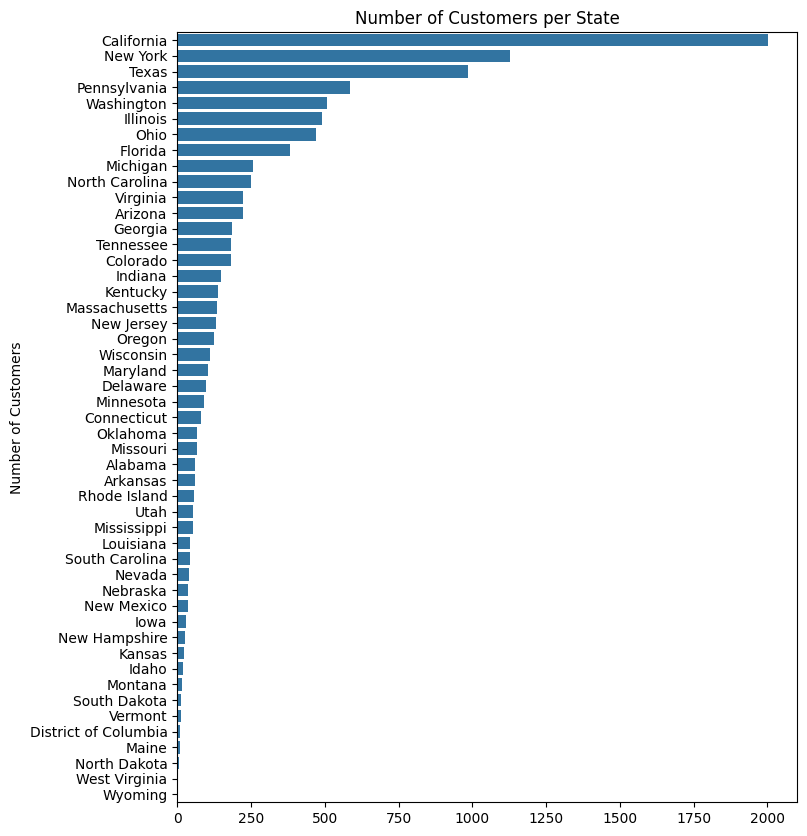

In [ ]:
# Chart - 1 visualization code
#value_count of customers in each state
plt.figure(figsize=(8, 10))
customer_counts = df['State'].value_counts()
sns.barplot(y=customer_counts.index, x=customer_counts.values)
#plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.title('Number of Customers per State')
plt.show()


##### 1. Why did you pick the specific chart?

In cases where the labels on the x-axis are long, a horizontal bar plot can provide more space for the labels to be displayed without overlapping. By orienting the bars horizontally, the labels are displayed along the y-axis, which typically allows for better readability, especially when dealing with a large number of categories.

##### 2. What is/are the insight(s) found from the chart?

we have made graph for Number of Customers per Country. From this graph we get to know that our customer segment is most from california and least from wyoming

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

With the knowledge that California has the highest number of customers, businesses can allocate more resources and focus their marketing efforts on this region.
lower number of customers in Wyoming could indicate limited market potential or lower demand for products or services in this region. Negative growth may occur if businesses have already tapped into the available market and are unable to attract new customers or expand their market share

#### Chart - 2

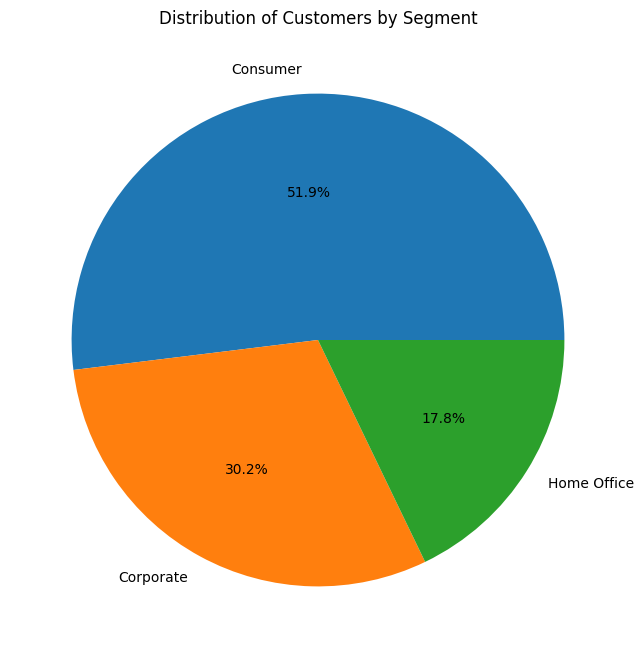

In [ ]:
# Chart - 2 visualization code
#Grouping the DataFrame by 'Segment' and calculating value counts
segment_counts = df['Segment'].value_counts();
plt.figure(figsize=(8, 8))
segment_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Customers by Segment')
plt.ylabel('')
plt.show()

##### 1. Why did you pick the specific chart?

I choosed this chart as i want to Show Distribution of Customers by Segment. So pie chart is best way to show to distribute this type of data.

##### 2. What is/are the insight(s) found from the chart?

Customer segmentation is a powerful technique that allows businesses to group customers based on shared characteristics

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Customer segmentation enables businesses to tailor their marketing efforts to specific customer groups based on shared characteristics such as demographics, behaviors, or preferences. By understanding the unique needs and interests of different customer segments, businesses can develop more relevant and personalized marketing campaigns.



#### Chart - 3

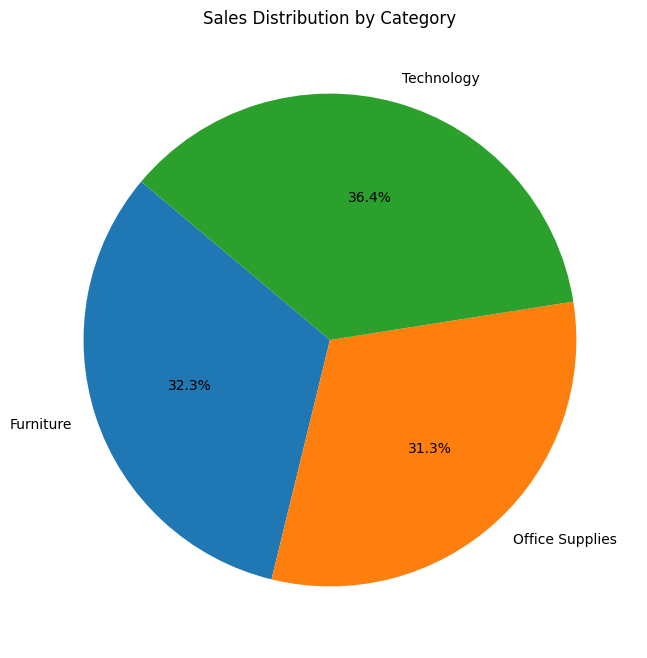

In [ ]:
category_sales = df.groupby('Category')['Sales'].sum()
plt.figure(figsize=(8, 8))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Category')
plt.show()



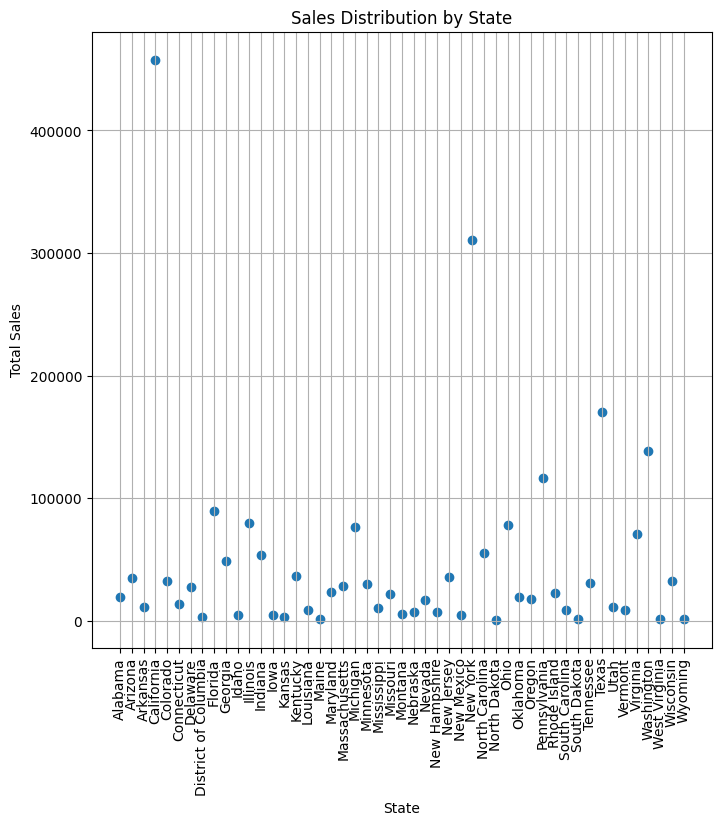

In [ ]:
import matplotlib.pyplot as plt

category_sales = df.groupby('State')['Sales'].sum()
plt.figure(figsize=(8, 8))
plt.scatter(category_sales.index, category_sales.values)
plt.title('Sales Distribution by State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid lines
plt.show()


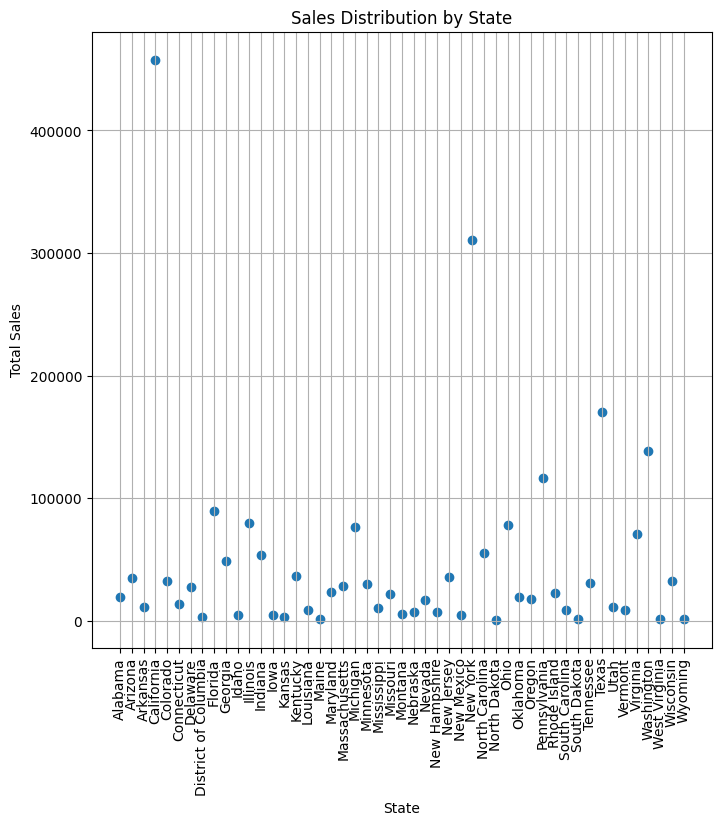

In [ ]:
#faltu566999
import matplotlib.pyplot as plt

category_sales = df.groupby('State')['Sales'].sum()
plt.figure(figsize=(8, 8))
plt.scatter(category_sales.index, category_sales.values)
plt.title('Sales Distribution by State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid lines
plt.show()


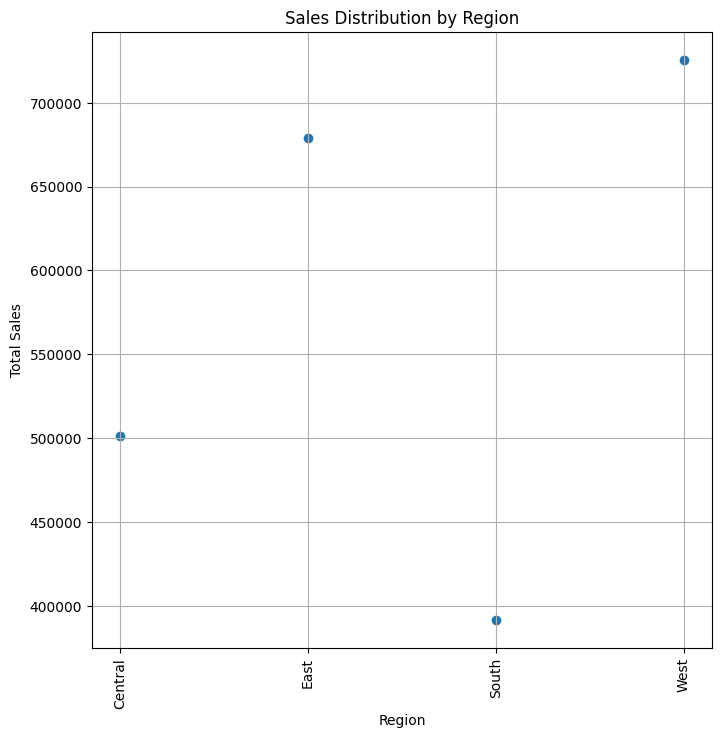

In [ ]:
#faltu566999
import matplotlib.pyplot as plt

category_sales = df.groupby('Region')['Sales'].sum()
plt.figure(figsize=(8, 8))
plt.scatter(category_sales.index, category_sales.values)
plt.title('Sales Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid lines
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are effective for illustrating the proportion of each segment relative to the total. In this case, we are interested in understanding how each category contributes to the total sales, making a pie chart an appropriate choice.

##### 2. What is/are the insight(s) found from the chart?


The significant contribution of the Technology category suggests that it is a strong revenue driver. Leveraging this insight, businesses can allocate resources strategically to further enhance sales in this category.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The significant contribution of the Technology category suggests that it is a strong revenue driver. Leveraging this insight, businesses can allocate resources strategically to further enhance sales in this category.

# Chart 4

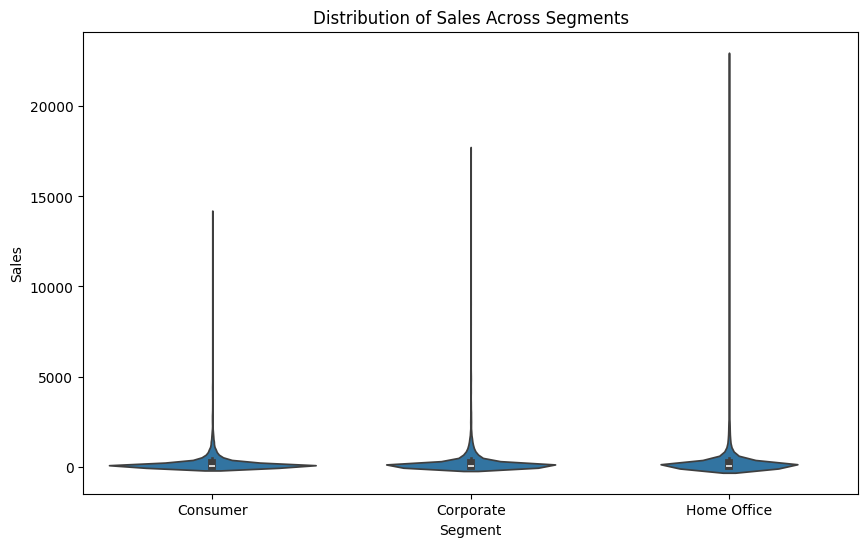

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Segment', y='Sales')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.title('Distribution of Sales Across Segments')
plt.show()



##### 1. Why did you pick the specific chart?

The violin plot is a great choice for visualizing the distribution of sales across different segments.The violin plot allows us to compare the sales distribution for each segment. By plotting the data as violin shapes, we can see the density of sales values at different levels.

##### 2. What is/are the insight(s) found from the chart?

We have made violin plot for visualizing the distribution of sales across different segments.we observed that density of sales is more for consumer segment.so Consumer segment has contributed most to sales

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

With the knowledge that the consumer segment contributes the most to sales, businesses can allocate more resources towards marketing efforts targeted at this segment.

Regarding insights that could lead to negative growth, one potential scenario could involve overreliance on the consumer segment for sales revenue. If businesses fail to diversify their customer base and become overly dependent on the consumer segment, they may be vulnerable

#### Chart - 5

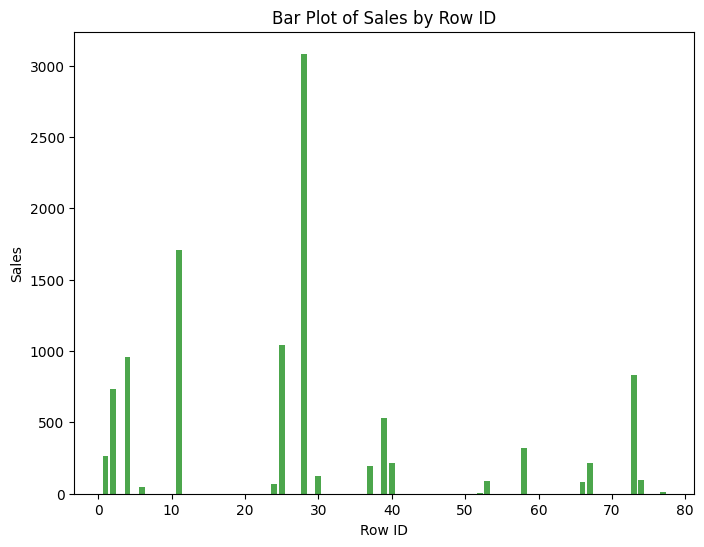

In [ ]:
#Bar plot sales by row id using subset of data frame
row_id_data = df['Row ID'][:20]
sales_data = df['Sales'][:20]

# Creating bar plot
plt.figure(figsize=(8, 6))
plt.bar(row_id_data, sales_data, color='green', alpha=0.7)
plt.title('Bar Plot of Sales by Row ID')
plt.xlabel('Row ID')
plt.ylabel('Sales')

plt.show()

##### 1. Why did you pick the specific chart?

The bar plot is effective for comparing numerical values across different categories or groups. In this scenario, we're comparing the sales values across different row IDs.

##### 2. What is/are the insight(s) found from the chart?

In this scenario, we're comparing the sales values across different row IDsThe length of each bar directly represents the sales value, making it easy to visually compare the sales performance of each row ID.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 bar plot reveal certain row IDs (representing products or product categories) with significantly higher sales than others. This insight can help the business focus on promoting and expanding the offerings of these top-selling productsities.

 While high sales volume is desirable, it's essential to consider the profitability of each product. Some products with high sales may have low profit margins or high associated costs, potentially leading to negative growth if not managed effectively. T

#### Chart - 6

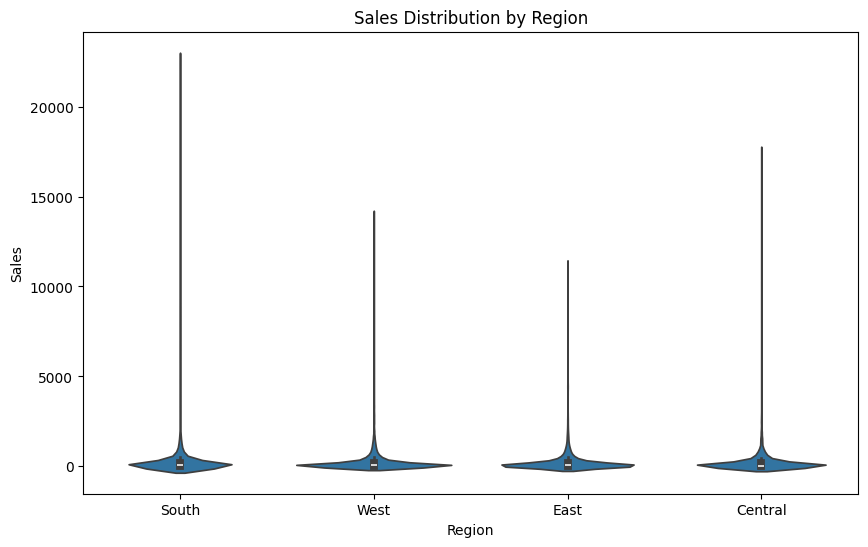

In [ ]:
# Chart - 6 visualization code
#sales distribution by region
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Region', y='Sales')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.title('Sales Distribution by Region')
plt.show()

##### 1. Why did you pick the specific chart?

A violin plot effectively shows the distribution of data, providing insights into the spread and shape of the sales data within each region.

 Violin plots allow for easy comparison across multiple categories in this case, regions. Each region's sales distribution is displayed side by side, enabling viewers to compare the sales patterns across different regions.

##### 2. What is/are the insight(s) found from the chart?

 Each region's sales distribution is displayed side by side, enabling viewers to compare the sales patterns across different regions and we observed that  the West region has the highest variability or spread in sales compared to the other regions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

understanding the higher variability in sales within the West region enables businesses to make more informed strategic decisions.

when businesses are unable to effectively mitigate the risks associated with sales variability, several negative consequences can occur, ultimately leading to negative growth

#### Chart - 7

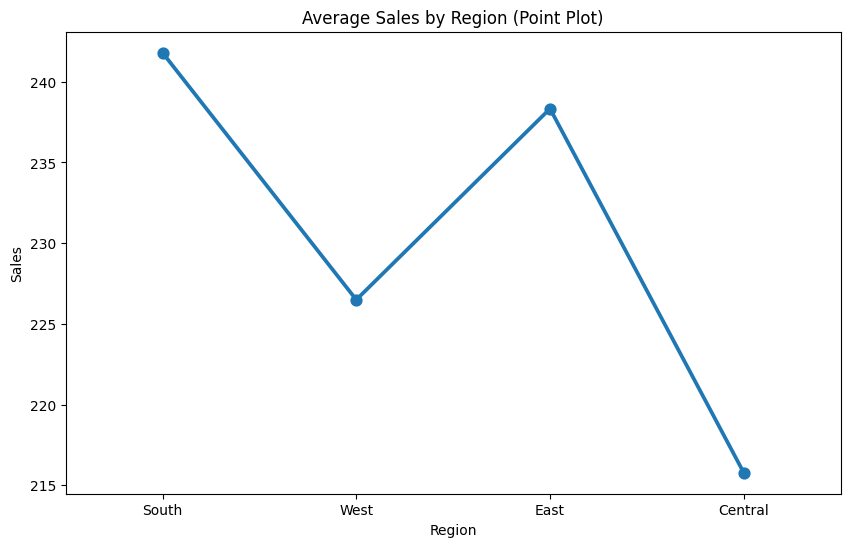

In [ ]:
# Chart - 7 visualization
#Average Sales by Region (Point Plot)
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='Region', y='Sales', errorbar=None)
plt.xlabel('Region')
plt.ylabel('Sales')
plt.title('Average Sales by Region (Point Plot)')
plt.show()

##### 1. Why did you pick the specific chart?

Point plots are designed to show point estimates (e.g., mean or median) along with confidence intervals. While they can provide insights into average sales values, they might not effectively convey the overall distribution of sales across regions

##### 2. What is/are the insight(s) found from the chart?

This Graph shows Average Sales by Region (Point Plot).The central region has lowest average sales and south has highest average sales

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 With the highest average sales, the south region presents a significant opportunity for growth. Businesses can focus on expanding their operations, increasing marketing efforts, and optimizing supply chains in this region.

 f the central region is saturated with competitors or lacks untapped markets, it might hinder growth prospect

#### Chart - 8

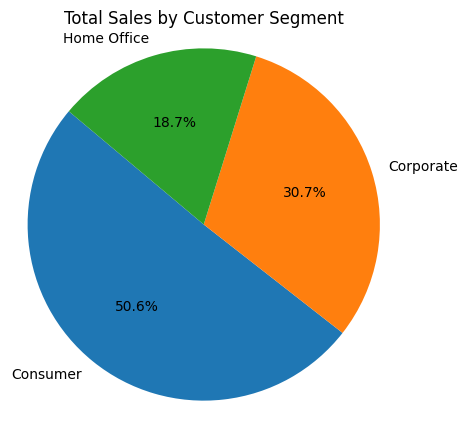

In [ ]:

# Chart - 8 visualization code
segment_sales = df.groupby('Segment')['Sales'].sum()
plt.figure(figsize=(5, 5))
plt.pie(segment_sales, labels=segment_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Sales by Customer Segment')
plt.axis('equal')
plt.show()



##### 1. Why did you pick the specific chart?

 Pie charts are effective for illustrating the proportion of each segment relative to the total. In this case, we are interested in understanding how each customer segment contributes to the total sales, making a pie chart an appropriate choice.

##### 2. What is/are the insight(s) found from the chart?

what we observed from Total Sales by Customer Segment pie chart is that consumer segement has contributed most to the sales and Home office has contributed least.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 The underperformance of the Home Office segment, contributing the least to sales, could indicate specific challenges or weaknesses within this segment. Negative growth in sales from the Home Office segment may be attributed to factors such as decreased demand for office-related products

#### Chart - 9

Text(0.5, 1.0, 'Histogram of Sales')

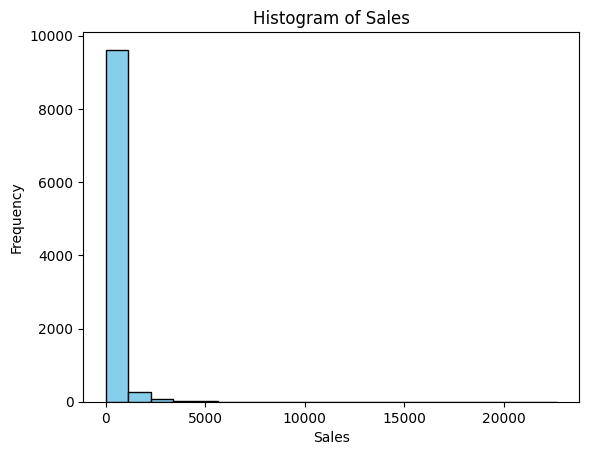

In [ ]:
# Chart - 9 visualization code
#plt.subplot(1, 2, 1)
plt.hist(df['Sales'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Histogram of Sales')

##### 1. Why did you pick the specific chart?

This choice of chart is this  suitable for exploring the 'Sales' .
 Histograms are excellent tools for visualizing the distribution of numerical data. They provide insights into the spread, central tendency, and shape of the data distribution.

##### 2. What is/are the insight(s) found from the chart?

what we observed from Histogram of sales is that sales less than 5000 have highest frequeny and sales are not greater than 5000 in any category

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 The histogram reveals the distribution of sales values across the dataset.  it shows sales less than 5000 has highest frequency range

#### Chart - 10

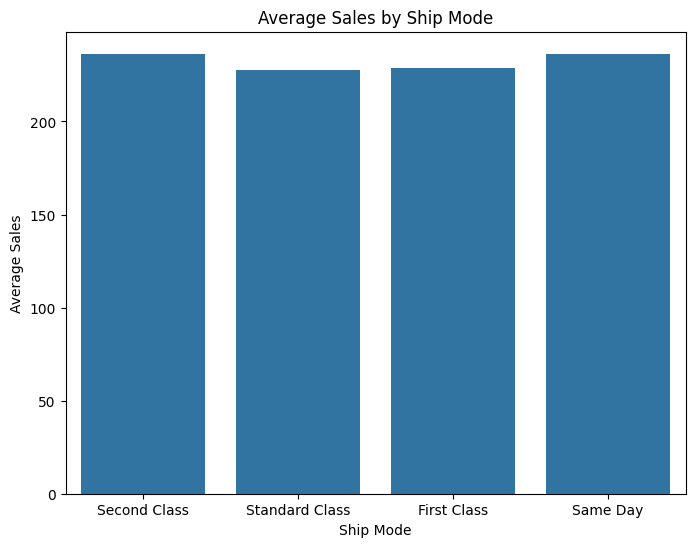

In [ ]:
# Chart - 10 visualization code
# Bar plot for 'Sales' by 'Ship Mode'
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Ship Mode', y='Sales', errorbar=None)
plt.title('Average Sales by Ship Mode')
plt.ylabel('Average Sales')
plt.show()

##### 1. Why did you pick the specific chart?

Bar plots are effective for comparing the average sales across different categories, in this case, the different ship modes. The length of each bar represents the average sales value, allowing for a clear visual comparison between the ship modes.

##### 2. What is/are the insight(s) found from the chart?

This graph shows plot for 'Sales' by 'Ship Mode'. we observes that second class ship mode is used most and contribute most to sales and there is very less sales difference between standard class and first class

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


The observation that the second class ship mode is used most and contributes the most to sales suggests that this mode is preferred by customers. This insight can guide businesses to allocate more resources, such as marketing efforts or inventory management, towards optimizing the second class shipping experience

 While it's important to focus on the most profitable shipping mode, completely neglecting underperforming modes such as standard class or first class without proper analysis could lead to negative growth

#### Chart - 11

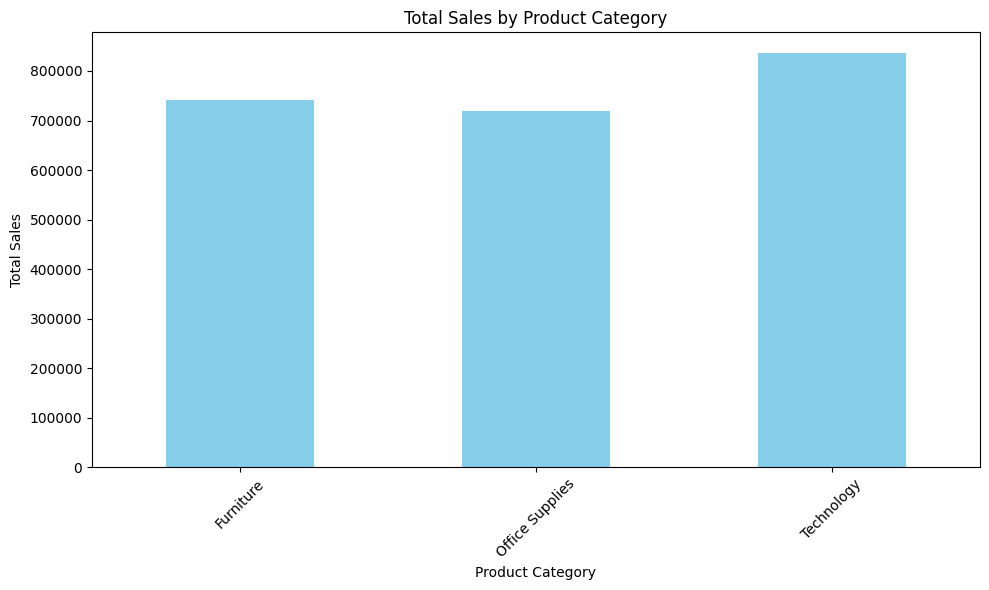

In [ ]:
# Chart - 11 visualization code
# Grouping the data by 'Category' and calculating the sum of 'Sales'
category_sales = df.groupby('Category')['Sales'].sum()
plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar', color='skyblue')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product Category')
plt.xticks(rotation=45)
plt.tight_layout()#adjust the layout auto
plt.show()

##### 1. Why did you pick the specific chart?

stacked bar plot allows us to visualize the total sales across different product categories, providing insights into the relative contribution of each category to overall sales.

##### 2. What is/are the insight(s) found from the chart?

It allows us to visualize the total sales across different product categories and technology has highest contribution of each category to overall sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Knowing that technology products are driving the highest sales can help businesses prioritize resources and strategic initiatives towards this category. This could involve investing in product development, marketing, and customer service for technology products to further capitalize on their success.

The technology market may become increasingly competitive, with numerous players vying for market share. This could lead to price wars, decreased profit margins, and challenges in maintaining sales growth.



#### Chart - 12

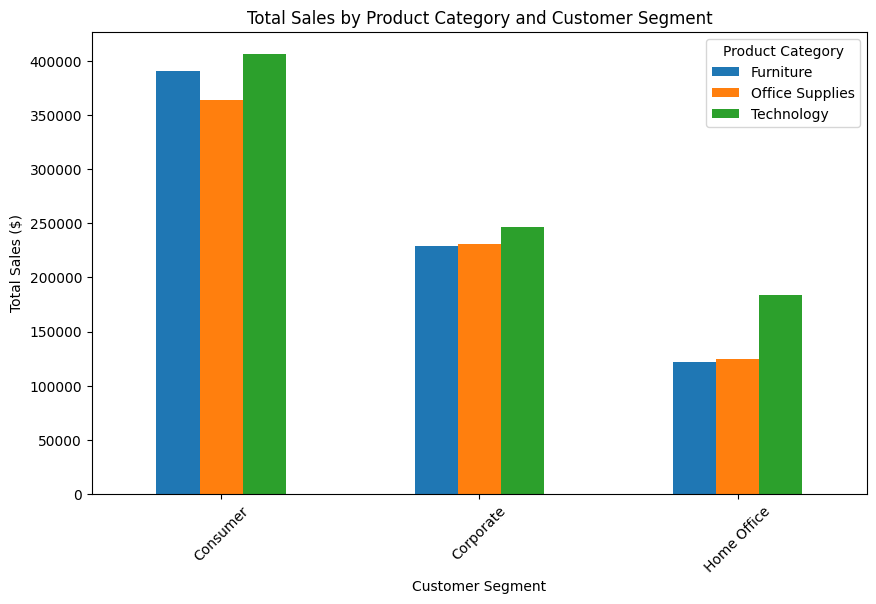

In [ ]:
# Chart - 12 visualization code
# What are the top-selling product categories for each customer segment?
segment_category_sales = df.groupby(['Segment', 'Category'])['Sales'].sum().unstack()
segment_category_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Total Sales by Product Category and Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.show()


##### 1. Why did you pick the specific chart?

I chose a bar chart because it effectively displays the total sales for each customer segment.
Bar charts are suitable for comparing values across different categories, making them ideal for visualizing total sales across customer segments.

##### 2. What is/are the insight(s) found from the chart?

This graph effectively displays the total sales for each customer segment. We observes that Technology contribute highest to sales in each consumer segment .

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Armed with the knowledge that technology products are top performers across all consumer segments, businesses can tailor their marketing strategies to highlight these popular items. This targeted approach can help attract more customers and increase sales.

Depending heavily on technology products may expose businesses to supply chain vulnerabilities, such as disruptions in manufacturing or distribution channels.

#### Chart - 13

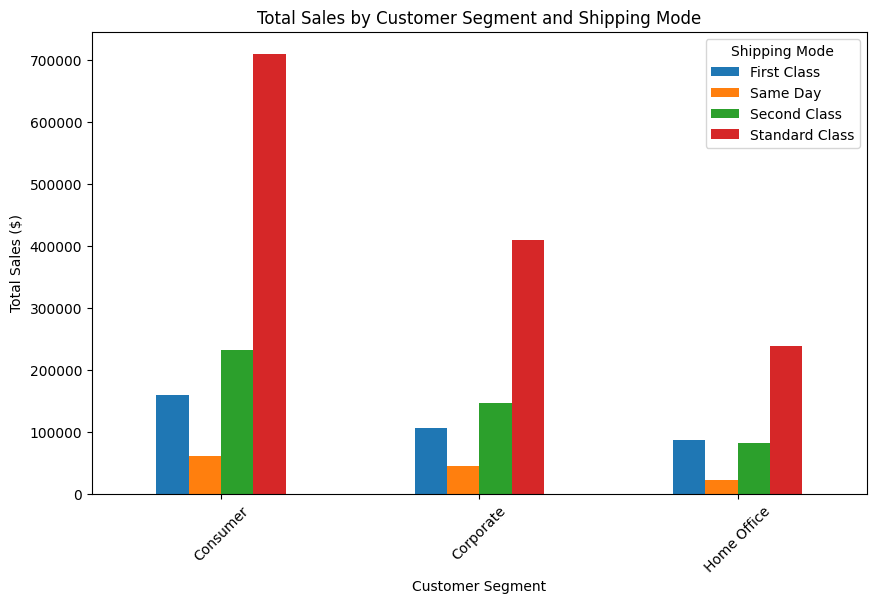

In [ ]:
 #Sales for each customer segment by shipping mode
segment_shipmode_sales = df.groupby(['Segment', 'Ship Mode'])['Sales'].sum().unstack()
segment_shipmode_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Total Sales by Customer Segment and Shipping Mode')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.legend(title='Shipping Mode')
plt.show()

##### 1. Why did you pick the specific chart?

 I chose a bar chart because it effectively displays the total sales for each customer segment and shipping mode. Bar charts are suitable for comparing values across different categories, making them ideal for visualizing total sales across customer segments.

##### 2. What is/are the insight(s) found from the chart?

This chart effectively displays the total sales for each customer segment and shipping mode.I observed that in each customer segment standard class has contributed most to total sales

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Armed with the knowledge that each customer segment loves standard class ship mode , businesses can tailor their marketing strategies to highlight these popular items. This targeted approach can help attract more customers and increase sales.

While it's important to focus on the most profitable shipping mode, completely neglecting underperforming modes such as standard class or first class without proper analysis could lead to negative growth

#### Chart - 14 - Correlation Heatmap

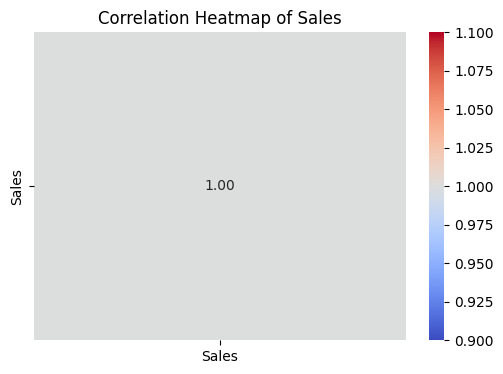

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Sales']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Sales')
plt.show()

##### 1. Why did you pick the specific chart?

We can  create a correlation heatmap between 'Sales' and itself, which will display the correlation coefficient of 'Sales' with itself, resulting in a single-cell heatmap with a correlation coefficient of 1.

##### 2. What is/are the insight(s) found from the chart?

 creating a correlation heatmap between 'Sales' and itself, which will only display the correlation coefficient of 'Sales' with itself, resulting in a single-cell heatmap with a correlation coefficient of 1.

#### Chart - 15 - Pair Plot

KeyboardInterrupt: 

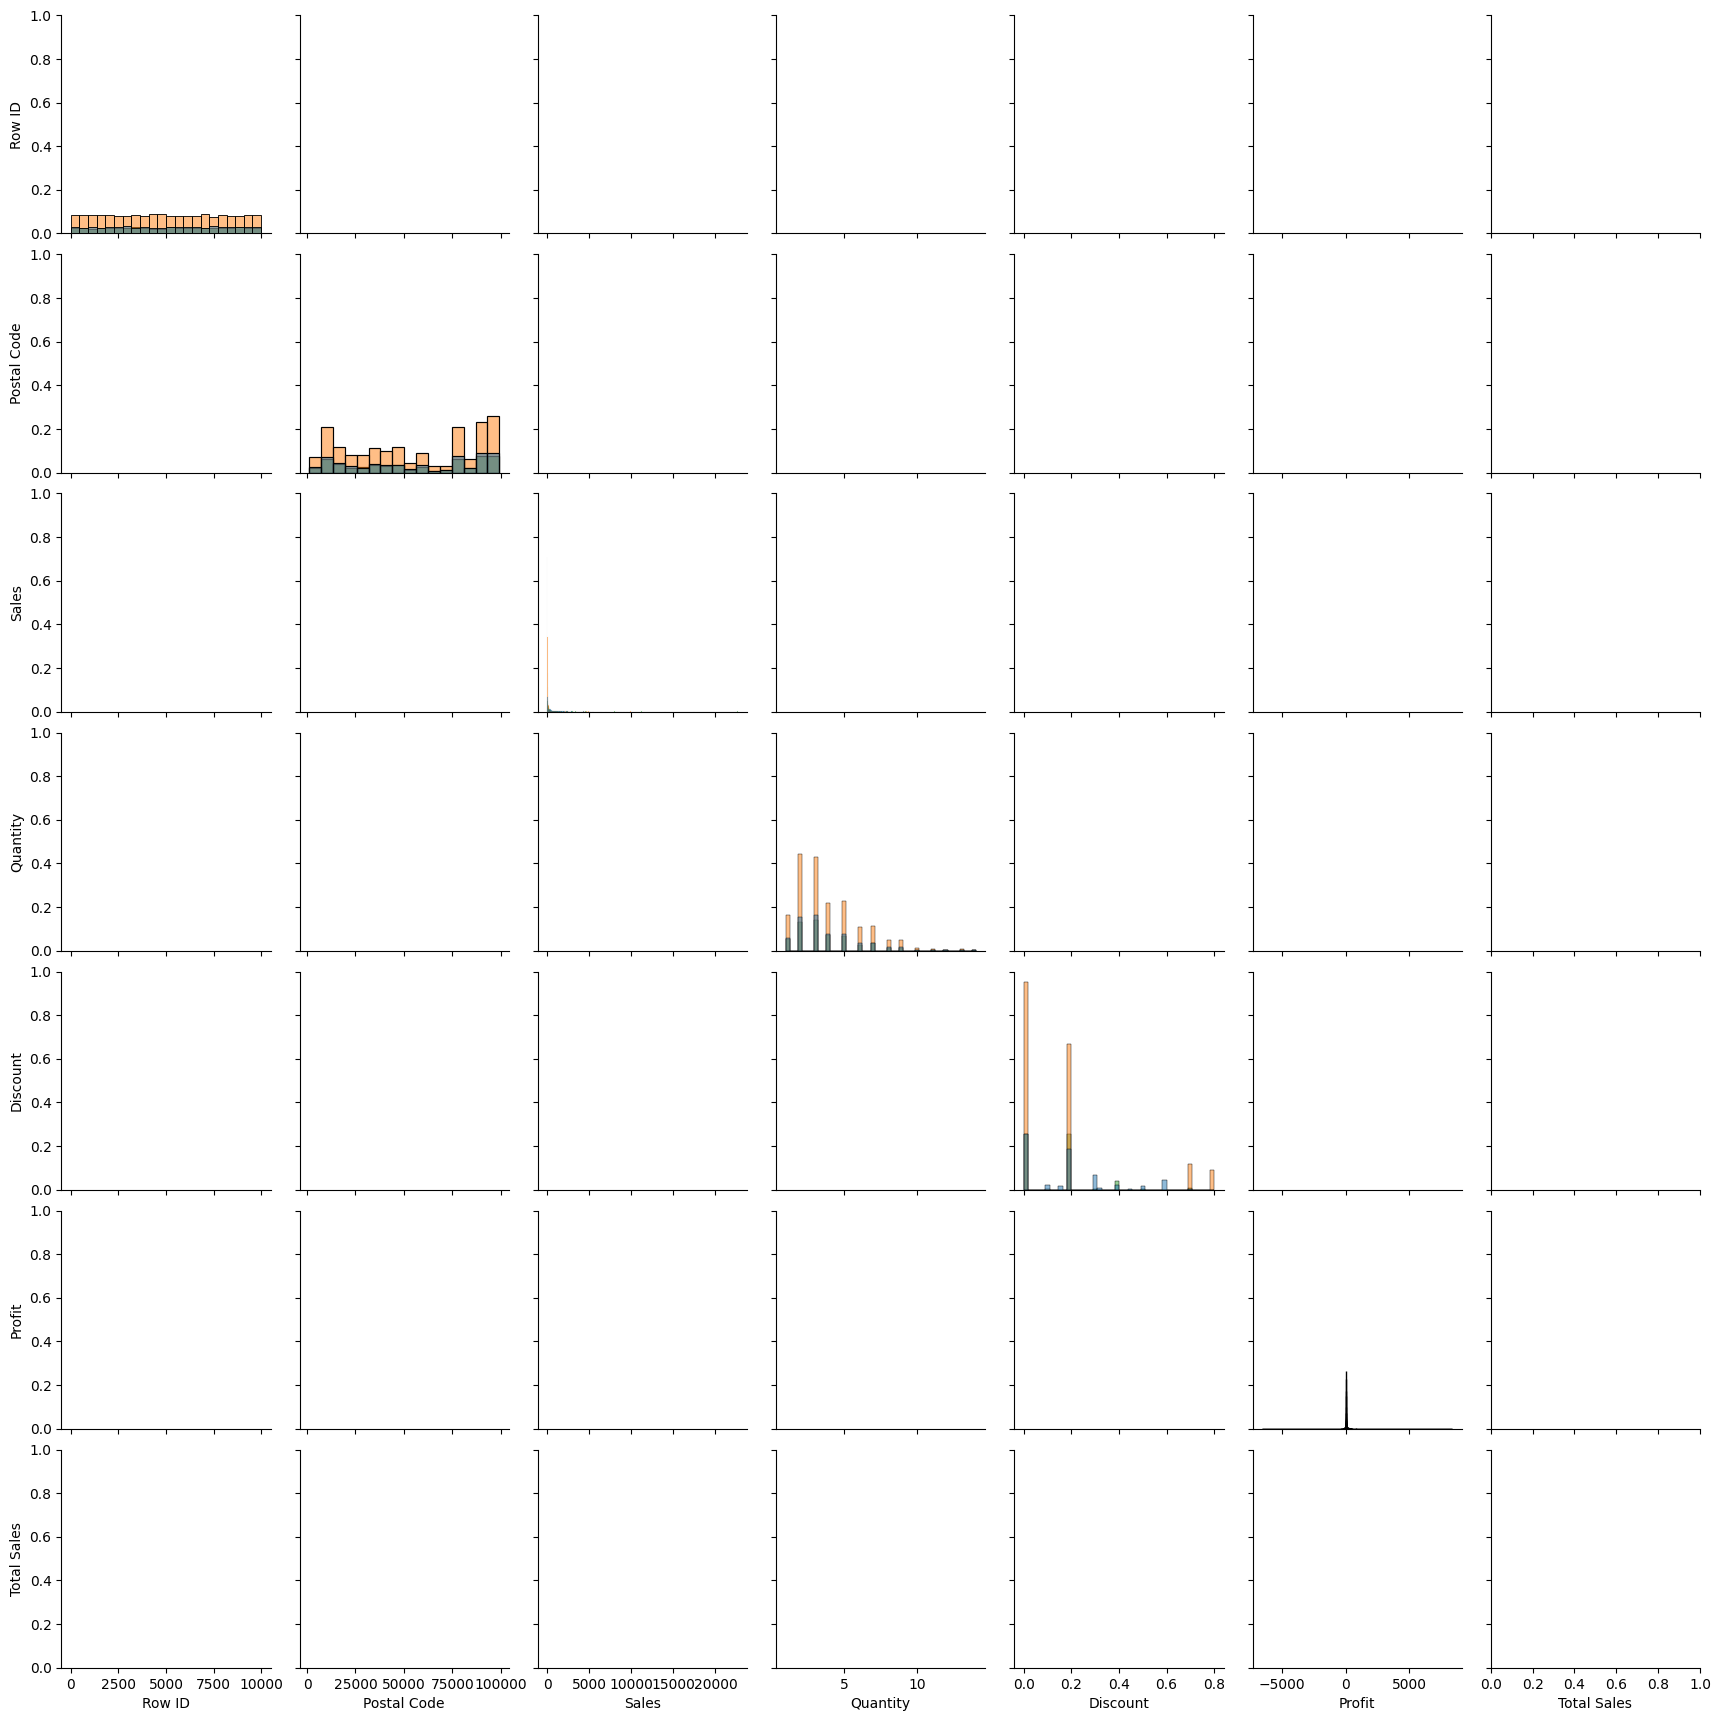

In [ ]:
# Pair Plot visualization code
# Filtering out NaN values in 'Sales' column
df_filtered = df.dropna(subset=['Sales'])

# Creating pairplot
sns.pairplot(df_filtered, hue='Category', diag_kind='hist')
plt.show()


##### 1. Why did you pick the specific chart?

I chose the pairplot because it allows us to visualize relationships between a numerical variable ('Sales') and several categorical variables ('Ship Mode', 'Segment', 'Region', 'Category') simultaneously. Since we have only one numerical attribute in the dataset ('Sales'), and the other attributes are categorical, a pairplot provides a convenient way to explore how 'Sales' varies across different categories.

##### 2. What is/are the insight(s) found from the chart?

From This pair plot we get to know sales are highly depenedent  on categorical variables ('Ship Mode', 'Segment', 'Region', 'Category') simultaneously. We have only 1 numerical varible sale. We observed that in each customer segment standard class has contributed most to total sales

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df['Postal Code'].fillna(0,inplace=True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

I have used zero imputation technique to fill missing value .It is a simple imputation method where missing values in a dataset are replaced with zeros. replacing missing values with zeros helps maintain the structure of the dataset.Zero imputation is straightforward and easy to understand

In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Total Sales'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

### 2. Categorical Encoding

In [ ]:
lablecol = df[['Ship Mode', 'Segment', 'State', 'Region', 'Category','Sub-Category','Country']]
dummi = pd.get_dummies(lablecol,drop_first=True)


dummi

,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Corporate,Segment_Home Office,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
9990,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
9991,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9992,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


#### What all categorical encoding techniques have you used & why did you use those techniques?


In the provided code, one-hot encoding technique is used to encode the 'Sub-Category' column.This technique creates binary indicator variables for each unique category within the column     

Binary encoding technique represents categories as binary digits, with each unique category mapped to a binary string. This encoding method is used for efficiency in terms of memory usage and computational complexity, especially when dealing with a large number of categories.

The technique used in the region is one-hot encoding. One-hot encoding is a technique used to convert categorical variables into a binary format, where each category is represented as a binary vectorOne-hot encoding treats each category as independent, meaning it does not assume any ordinal relationship between categories.

The technique used in the provided code snippet is also one-hot encoding. Each line of code creates a binary variable for a specific state based on the 'State'



### 3. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
dh = pd.concat([df,dummi], axis=1)
dh = dh.drop(['Ship Mode', 'Segment','State', 'Region', 'Category','Sub-Category','Country'], axis=1)
dh.drop(columns=['Product ID' ,'Order ID','Customer ID','Row ID','Postal Code','Customer Name','Ship Date','Order Date','City','Product Name','Total Sales'], inplace=True)
dh.head()

,Sales,Quantity,Discount,Profit,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Corporate,Segment_Home Office,State_Arizona,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,261.9600,2,0.00,41.9136,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,731.9400,3,0.00,219.5820,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,957.5775,5,0.45,-383.0310,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,48.8600,7,0.00,14.1694,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,1706.1840,9,0.20,85.3092,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


#### 2. Feature Selection

##### What all feature selection methods have you used  and why?

By Observing above charts like  box plots or violin plots to visualize the distribution of sales AND Profits for each region. This can help identify any variations or patterns in sales and profits across different regions similarly for category and sub-category we observed that these are important features effecting sales and profits


##### Which all features you found important and why?

From above charts i found that category ,sub-category ,Segemnts ,Ship Mode and Regions are most inportant features which are effecting sales
so i considered them as independent variables and Sales as dependent variables

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

We did data scaling

### 4. Data Scaling

We did scaling only in dependent varible named sales as my most of independent variables are categorical so after encoding they will be in 0 to 1 format .

> Add blockquote



In [ ]:
# Scaling your data
#scaler = StandardScaler()
#scalecol = ['Sales']
#for col in scalecol:
#  dm[col] = scaler.fit_transform(dm[[col]])

scaler = StandardScaler()

scalecol = ['Sales', 'Quantity', 'Discount', 'Profit']
for i in scalecol:
    dh[i] = scaler.fit_transform(dh[[i]])

##### Which method have you used to scale you data and why?
StandardScaler from scikit-learn library is used to scale the data. The StandardScaler scales each feature by subtracting the mean and dividing by the standard deviation, which results in a distribution with a mean of 0 and a standard deviation of 1

It is less sensitive to outliers compared to other scaling methods like min-max scaling that's why we have used it here

In [ ]:
dh.shape

(9994, 78)

In [ ]:
dh.columns

Index(['Sales', 'Quantity', 'Discount', 'Profit', 'Ship Mode_Same Day',
       'Ship Mode_Second Class', 'Ship Mode_Standard Class',
       'Segment_Corporate', 'Segment_Home Office', 'State_Arizona',
       'State_Arkansas', 'State_California', 'State_Colorado',
       'State_Connecticut', 'State_Delaware', 'State_District of Columbia',
       'State_Florida', 'State_Georgia', 'State_Idaho', 'State_Illinois',
       'State_Indiana', 'State_Iowa', 'State_Kansas', 'State_Kentucky',
       'State_Louisiana', 'State_Maine', 'State_Maryland',
       'State_Massachusetts', 'State_Michigan', 'State_Minnesota',
       'State_Mississippi', 'State_Missouri', 'State_Montana',
       'State_Nebraska', 'State_Nevada', 'State_New Hampshire',
       'State_New Jersey', 'State_New Mexico', 'State_New York',
       'State_North Carolina', 'State_North Dakota', 'State_Ohio',
       'State_Oklahoma', 'State_Oregon', 'State_Pennsylvania',
       'State_Rhode Island', 'State_South Carolina', 'State_South 

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

 5. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
#x=dm.drop(columns=['Sales'])
#y=dm['Sales']
y = dh['Profit']
x = dh.drop(['Profit'], axis=1)
x.shape, y.shape
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

##### What data splitting ratio have you used and why?


 We have used **80% for training data** (x_train, y_train) and **20% for testing data** (x_test, y_test). This means that 80% of the data will be used for training the model, and the remaining 20% will be used for testing the model's performance.

This particular ratio of** 80:20 **is a commonly used default ratio for splitting data into training and testing sets in machine learning

**Balance between Training and Testing:** An 80:20 ratio strikes a balance between having enough data for training the model to learn patterns and having enough data for testing the model's performance. It ensures that the model has sufficient training data while still reserving a sizable portion for evaluation.

**Reducing Overfitting**: With a smaller test set, there is a risk of overfitting the model to the training data, resulting in poor generalization to unseen data. By allocating a larger proportion (80%) to training data, there is a better chance of capturing underlying patterns in the data without overfitting.

## ***6. ML Model Implementation***

### ML Model - 1

In [ ]:
from sklearn.tree import DecisionTreeRegressor
models = ['DecisionTreeRegressor']
dt_model = DecisionTreeRegressor(random_state=0).fit(x_train,y_train)
dt_pred = dt_model.predict(x_test)
dt_train=dt_model.predict(x_train)

#R2_values = [r2_score(y_test,dt_pred)]
#dt_r2=(r2_score(y_test,dt_pred))
#print(f"Decision Tree R^2 score: {dt_r2}")

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Decision Tree Regressor:**

**Algorithm:** Decision trees partition the feature space into regions, with each region representing a simple decision rule. These rules are learned from the training data by recursively splitting the data based on the feature that best separates the target variable.

**random_state:** This parameter sets the random seed for reproducibility. By setting it to a fixed value (random_state=0), we ensure that the same random patterns are generated each time the model is trained, leading to consistent results.

**Performance Evaluation:**
To evaluate the performance of the Decision Tree Regressor, similar to the Random Forest Regressor, you can use various evaluation metrics. Here's how you can utilize them and interpret the results:

**Mean Squared Error (MSE):**
Calculate the MSE between the actual target values (y_test) and the predicted target values (dt_pred). MSE measures the average squared difference between the predicted and actual values.
Lower MSE values indicate better model performance, reflecting smaller prediction errors.

**Root Mean Squared Error (RMSE):**
Calculate the square root of MSE to obtain RMSE. It's in the same units as the target variable and provides a more interpretable measure.
Lower RMSE values indicate better model performance, similar to MSE.
R-squared (R2) Score:

**Calculated the R2 score** between the actual target values (y_test) and the predicted target values (dt_pred). R2 score measures the proportion of the variance in the dependent variable that is predictable from the independent variables.

**R2 score ** ranges from 0 to 1, where 1 indicates a perfect fit. Higher R2 values indicate better model performance.

In [ ]:
# Visualizing evaluation Metric Score chart
#defining metric score chart

dt_mse=(mean_squared_error(y_test,dt_pred))
dt_rmse=(math.sqrt(mean_squared_error(y_train,dt_train)))
dt_r2_train=(r2_score(y_train, y_train))
dt_r2_test=(r2_score(y_test, dt_pred))


print("Mean squared error:")
print(mean_squared_error(y_test,dt_pred))
print("Root Mean squared error:")
print(math.sqrt(mean_squared_error(y_train,dt_train)))
print("Traning R-squared score:")
print(r2_score(y_train, y_train))
print("Testing R-squared score:")
print(r2_score(y_test, dt_pred))


Mean squared error:
0.06139926166749365
Root Mean squared error:
0.00400064340293227
Traning R-squared score:
1.0
Testing R-squared score:
0.8132147013589434


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

In [ ]:
# ML Model - 2
# Fit the Algorithm
# Predict on the model
from sklearn.svm import SVR
models = ['SVR']
svr_model = SVR(kernel='rbf').fit(x_train,y_train)
svr_pred = svr_model.predict(x_test)
svr_train = svr_model.predict(x_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Support Vector Regressor (SVR):

**Algorithm: ** SVR is a supervised learning algorithm used for regression tasks. It works by finding the hyperplane that best fits the data, with a margin that aims to minimize the error between the actual and predicted values while controlling for overfitting.

**Kernel:** The RBF kernel is used here (kernel='rbf'). It is suitable for non-linear data and transforms the input space into a higher-dimensional space, making it easier to find a hyperplane that separates or predicts the data points effectively.
Performance Evaluation:

To evaluate the performance of the SVR model, you can employ various evaluation metrics. Here's how to utilize them and interpret the results:

**Mean Squared Error (MSE): **

Calculate the MSE between the actual target values (y_test) and the predicted target values (svr_pred). MSE measures the average squared difference between the predicted and actual values.
Lower MSE values indicate better model performance, reflecting smaller prediction errors.

**Root Mean Squared Error (RMSE):**

Calculate the square root of MSE to obtain RMSE. It's in the same units as the target variable and provides a more interpretable measure.
Lower RMSE values indicate better model performance, similar to MSE.
R-squared (R2) Score:

**Calculate the R2 score between the actual target values (y_test)** and the predicted target values (svr_pred). R2 score measures the proportion of the variance in the dependent variable that is predictable from the independent variables.

**R2 score ranges from 0 to 1**, where 1 indicates a perfect fit. Higher R2 values indicate better model performance.

In [ ]:
# Define evaluation metric scores
R2_value = r2_score(y_train,svr_train)
R2_values = r2_score(y_test,svr_pred)
svr_mse=(mean_squared_error(y_test,svr_pred))
svr_rmse=(math.sqrt(mean_squared_error(y_test,svr_pred)))

print("Mean squared error:")
print(mean_squared_error(y_test,svr_pred))
print("root Mean squared error:")
print(math.sqrt(mean_squared_error(y_train,svr_train)))
print("Training R-squared score:")
print(R2_value)
print("Testing R-squared score:")
print(R2_values)


Mean squared error:
0.07451797659773982
root Mean squared error:
0.8235992029774187
Training R-squared score:
0.4191583516977252
Testing R-squared score:
0.7733057021383516


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model
from sklearn.ensemble import RandomForestRegressor
models = ['RandomForestRegressor']
rf_model = RandomForestRegressor(n_estimators=10, random_state=0).fit(x_train,y_train)
rf_pred = rf_model.predict(x_test)
rf_train=rf_model.predict(x_train)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Random Forest Regressor:**

**Algorithm:** Random Forest works by building multiple decision trees during training. Each tree is trained on a subset of the data and a random subset of features. This randomness helps to decorrelate the trees and reduces overfitting.

**n_estimators:** This parameter specifies the number of trees in the forest. In the provided code, n_estimators=10 means the Random Forest consists of 10 decision trees.

**random_state: **This parameter sets the random seed for reproducibility. Setting it to a fixed value (random_state=0) ensures that the same random patterns are generated each time the model is trained, leading to consistent results.

In [ ]:
# Visualizing evaluation Metric Score chart

ran_R2_value = r2_score(y_train,rf_train)
ran_R2_values = r2_score(y_test,rf_pred)
ran_mse=mean_squared_error(y_test,rf_pred)
ran_rmse=math.sqrt(mean_squared_error(y_test,rf_pred))
print(ran_rmse)


print("Mean squared error:")
ran_mse=mean_squared_error(y_test,rf_pred)
print(mean_squared_error(y_test,rf_pred))
print("root Mean squared error:")
print(math.sqrt(mean_squared_error(y_test,rf_pred)))
print("Training R-squared score:")
print(R2_value)
print("Testing R-squared score:")
print(R2_values)


0.26875890710941347
Mean squared error:
0.07223135015064633
root Mean squared error:
0.26875890710941347
Training R-squared score:
0.4191583516977252
Testing R-squared score:
0.7733057021383516


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes Decision Tree model have best R2 score .Its training R2 score is 1
and testing R2 score is 0.88 which is highest accuracy which we have achived through our all models

In [ ]:
#model 4
#linear regression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

y_pred_train = regressor.predict(x_train)
y_pred_test = regressor.predict(x_test)

#defining metric score chart
lmse=(mean_squared_error(y_test, y_pred_test))
lrmse=(math.sqrt(mean_squared_error(y_test, y_pred_test)))
lr2train=(r2_score(y_train, y_pred_train))
lr2test=(r2_score(y_test, y_pred_test))

print("Mean squared error:")
print(mean_squared_error(y_test, y_pred_test))
print("root Mean squared error:")
print(math.sqrt(mean_squared_error(y_train, y_pred_train)))
print("Training R-squared score:")
print(r2_score(y_train, y_pred_train))
print("Testing R-squared score:")
print(r2_score(y_test, y_pred_test))

7006397753741.779
[ 4.96118548e-01 -3.39770315e-02 -3.22605412e-01 -1.38694212e-01
 -1.04318036e-01 -7.61623478e-02  2.87699951e-03  3.70732313e-03
  2.60648186e+12  2.83717502e-02  2.60648186e+12  2.60648186e+12
  4.16384684e+11  4.16384684e+11  4.16384684e+11  5.15068979e-02
  2.44347422e-02  2.60648186e+12  1.60837277e+12  1.60837277e+12
  1.60837277e+12  1.60837277e+12  2.97866863e-01 -2.10778676e-01
  4.16384684e+11  4.16384684e+11  4.16384684e+11  1.60837277e+12
  1.60837277e+12 -8.36702272e-02  1.60837277e+12  2.60648186e+12
  1.60837277e+12  2.60648186e+12  4.16384684e+11  4.16384684e+11
  2.60648186e+12  4.16384684e+11 -1.23428345e-01  1.60837277e+12
  4.16384684e+11  1.60837277e+12  2.60648186e+12  4.16384684e+11
  4.16384684e+11 -4.00878906e-01  1.60837277e+12 -6.98852539e-02
  1.60837277e+12  2.60648186e+12  4.16384684e+11  9.27734375e-02
  2.60648186e+12  4.16384684e+11  1.60837277e+12  2.60648186e+12
  1.19198809e+12  1.60837277e+12 -9.98109084e+11 -8.81615904e+12
 -8.614

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I will choose Rmse for future

**Interpretability**:* RMSE provides an error metric that is directly interpretable in the same units as the target variable (profit), making it easier to understand the magnitude of prediction errors.

**Sensitivity to Large Errors:**  RMSE penalizes larger errors more heavily than smaller errors, providing a more nuanced assessment of model performance, especially for outliers or large deviations.

**Consistency with Model Optimization:** RMSE is commonly used as the loss function in optimization algorithms for training regression models, ensuring consistency between model training and evaluation.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I will choose  Decision tree for future prediction as its r2 score is 1 for training set and for testing set it is 0.81 which is very high accuracy

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

**Decision Tree Algorithm:**

Decision tree is a supervised learning algorithm used for both classification and regression tasks.

It works by recursively partitioning the feature space into subsets based on the values of features, creating a tree-like structure where each internal node represents a decision based on a feature, and each leaf node represents a predicted outcome.

The splitting process aims to maximize the homogeneity (purity) of the subsets with respect to the target variable.


**Feature Importance Analysis:**

Gini Importance or Mean Decrease in Impurity (MDI):
One common method for determining feature importance in decision trees is to measure how much each feature contributes to decreasing impurity (Gini impurity or entropy) across all nodes where it is used for splitting.

Features that lead to the greatest reduction in impurity are considered more important.

# **Conclusion**

In [ ]:
model_data = pd.DataFrame()

model_data['Model Name'] = ['Linear Regression','Decision Tree','Random Forest','SVR']
model_data['MSE'] = [lmse,dt_mse,ran_mse,svr_mse]
model_data['RMSE'] = [lrmse,dt_rmse,ran_rmse,svr_rmse]
model_data['R2 train'] =[lr2train,dt_r2_train,ran_R2_value,R2_value]
model_data['R2 test'] =[lr2test,dt_r2_test,ran_R2_values,R2_values]
model_data

,Model Name,MSE,RMSE,R2 train,R2 test
0,Linear Regression,0.225267,0.474623,0.315996,0.314705
1,Decision Tree,0.061399,0.004001,1.000000,0.813215
2,Random Forest,0.072231,0.268759,0.936094,0.780262
3,SVR,0.074518,0.272980,0.419158,0.773306


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***